In [2]:
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END

## Reducers
from typing import Annotated
from langgraph.graph.message import add_messages

In [3]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [4]:
from dotenv import load_dotenv
load_dotenv()

import os

os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [5]:
from langchain_groq import ChatGroq
llm=ChatGroq(model="openai/gpt-oss-120b")
llm.invoke("Hello")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'reasoning_content': 'The user says "Hello". We need to respond politely. No special instructions. Just greet back.'}, response_metadata={'token_usage': {'completion_tokens': 39, 'prompt_tokens': 72, 'total_tokens': 111, 'completion_time': 0.081191904, 'completion_tokens_details': {'reasoning_tokens': 21}, 'prompt_time': 0.002878633, 'prompt_tokens_details': None, 'queue_time': 0.017672335, 'total_time': 0.084070537}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_2804ae6b41', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c67ac-2f0f-75b2-9323-7d97a31f0887-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 72, 'output_tokens': 39, 'total_tokens': 111, 'output_token_details': {'reasoning': 21}})

In [6]:
from langgraph.checkpoint.memory import MemorySaver
memory=MemorySaver()
def superbot(state:State):
    return {"messages":[llm.invoke(state['messages'])]}

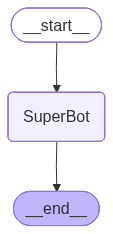

In [7]:
graph=StateGraph(State)

## node 
graph.add_node("SuperBot",superbot)

## Edges
graph.add_edge(START,"SuperBot")
graph.add_edge("SuperBot",END)

graph_builder=graph.compile(checkpointer=memory)

## Display 
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [8]:
## Invocation

config = {"configurable": {"thread_id": "1"}}
graph_builder.invoke({'messages':"Hi,My name is Giovanni And I like programming"},config=config)

{'messages': [HumanMessage(content='Hi,My name is Giovanni And I like programming', additional_kwargs={}, response_metadata={}, id='7e0e3ccf-05f5-4654-a092-484fe8fbc6fb'),
  AIMessage(content='Hello Giovanni! 👋  \n\nIt’s great to meet a fellow programming enthusiast. What kind of projects are you working on, or which languages and technologies do you enjoy most? If you ever need advice, a code review, or just want to discuss a cool idea, I’m here to help! 🚀', additional_kwargs={'reasoning_content': 'The user says: "Hi, My name is Giovanni And I like ...". Probably they are just greeting. The assistant should respond politely, maybe ask about their programming interests, offer help. The system didn\'t specify any special behavior. So respond friendly.'}, response_metadata={'token_usage': {'completion_tokens': 122, 'prompt_tokens': 81, 'total_tokens': 203, 'completion_time': 0.254483631, 'completion_tokens_details': {'reasoning_tokens': 51}, 'prompt_time': 0.003099548, 'prompt_tokens_det

## Streaming

**Methods:** `.stream()` and `.astream()`

- These methods are sync and async methods for streaming back results.

### Additional parameters in streaming modes for graph state

- **values**: This streams the full state of the graph after each node is called.
- **updates**: This streams updates to the state of the graph after each node is called.

In [9]:
# Create a thread
config = {"configurable":{"thread_id": "2"}}

for chunk in graph_builder.stream({'messages':"Hi, My name is Giovanni and I like programming"},config,stream_mode="updates"):
    print(chunk)

{'SuperBot': {'messages': [AIMessage(content="Hey Giovanni! 👋 Great to meet a fellow programming enthusiast. What languages or projects are you currently working on (or dreaming about)? I'd love to hear about what excites you in the world of code!", additional_kwargs={'reasoning_content': 'We need to respond. The user says "Hi, My name is Giovanni and I like programming". We should greet them, perhaps ask about programming interests, etc. No special constraints. Just respond friendly.'}, response_metadata={'token_usage': {'completion_tokens': 93, 'prompt_tokens': 81, 'total_tokens': 174, 'completion_time': 0.194159632, 'completion_tokens_details': {'reasoning_tokens': 42}, 'prompt_time': 0.003007198, 'prompt_tokens_details': None, 'queue_time': 0.017647355, 'total_time': 0.19716683}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_178e424650', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c67ac-3832-7e12

In [10]:
for chunk in graph_builder.stream({'messages':"Hi, My name is Giovanni and I like programming"},config,stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi, My name is Giovanni and I like programming', additional_kwargs={}, response_metadata={}, id='dd9ff38f-98ad-45c6-b87b-3cdf453849d5'), AIMessage(content="Hey Giovanni! 👋 Great to meet a fellow programming enthusiast. What languages or projects are you currently working on (or dreaming about)? I'd love to hear about what excites you in the world of code!", additional_kwargs={'reasoning_content': 'We need to respond. The user says "Hi, My name is Giovanni and I like programming". We should greet them, perhaps ask about programming interests, etc. No special constraints. Just respond friendly.'}, response_metadata={'token_usage': {'completion_tokens': 93, 'prompt_tokens': 81, 'total_tokens': 174, 'completion_time': 0.194159632, 'completion_tokens_details': {'reasoning_tokens': 42}, 'prompt_time': 0.003007198, 'prompt_tokens_details': None, 'queue_time': 0.017647355, 'total_time': 0.19716683}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 

In [11]:
for chunk in graph_builder.stream({'messages':"I also like nature"},config,stream_mode="updates"):
    print(chunk)

{'SuperBot': {'messages': [AIMessage(content='That’s a wonderful combo, Giovanni—tech\u202f+\u202fthe great outdoors! 🌳💻  \n\nDo you have a favorite type of nature (hiking trails, birds, forests, marine life, etc.)?  \nAnd have you ever thought about blending the two, like:\n\n* **Environmental data projects** – pulling in sensor data, satellite imagery, or citizen‑science APIs to monitor air quality, water levels, wildlife sightings, etc.  \n* **Nature‑inspired algorithms** – genetic algorithms, swarm intelligence, or cellular automata that mimic ecosystems.  \n* **Outdoor‑friendly apps** – trail‑mapping tools, plant‑identification helpers, or low‑power field‑logging apps for your hikes.  \n\nI’d love to hear what aspects of nature spark your curiosity and whether you’ve tinkered with any nature‑themed code. 🌿🚀', additional_kwargs={'reasoning_content': 'User: "I also like nature". They are sharing personal interests. Should respond engagingly, ask about nature interests, maybe combine

In [13]:
for chunk in graph_builder.stream({'messages':"I love sports"},config,stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi, My name is Giovanni and I like programming', additional_kwargs={}, response_metadata={}, id='dd9ff38f-98ad-45c6-b87b-3cdf453849d5'), AIMessage(content="Hey Giovanni! 👋 Great to meet a fellow programming enthusiast. What languages or projects are you currently working on (or dreaming about)? I'd love to hear about what excites you in the world of code!", additional_kwargs={'reasoning_content': 'We need to respond. The user says "Hi, My name is Giovanni and I like programming". We should greet them, perhaps ask about programming interests, etc. No special constraints. Just respond friendly.'}, response_metadata={'token_usage': {'completion_tokens': 93, 'prompt_tokens': 81, 'total_tokens': 174, 'completion_time': 0.194159632, 'completion_tokens_details': {'reasoning_tokens': 42}, 'prompt_time': 0.003007198, 'prompt_tokens_details': None, 'queue_time': 0.017647355, 'total_time': 0.19716683}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 

# Streaming The Responses With astream Method

**Streaming tokens**  
We often want to stream more than graph state.

In particular, with chat model calls it is common to stream the **tokens** as they are generated.

We can do this using the `.astream_events` method, which streams back events as they happen inside nodes.

Each event is a dict with a few keys:

- **event**: This is the type of event that is being emitted.
- **name**: This is the name of the event.
- **data**: This is the data associated with the event.
- **metadata**: Contains `langgraph_node`, the node emitting the event.


In [14]:
config = {"configurable": {"thread_id": "3"}}

async for event in graph_builder.astream_events({"messages":["Hi, My name is Giovanni and I like programming"]},config,version="v2"):
    print(event)

{'event': 'on_chain_start', 'data': {'input': {'messages': ['Hi, My name is Giovanni and I like programming']}}, 'name': 'LangGraph', 'tags': [], 'run_id': '019c67c1-bd53-74e0-8486-e70e64bdb02f', 'metadata': {'thread_id': '3'}, 'parent_ids': []}
{'event': 'on_chain_start', 'data': {'input': {'messages': [HumanMessage(content='Hi, My name is Giovanni and I like programming', additional_kwargs={}, response_metadata={}, id='7ac8e4bc-ebea-4dae-9ab8-0d8d0ea4a430')]}}, 'name': 'SuperBot', 'tags': ['graph:step:1'], 'run_id': '019c67c1-bd56-73e3-851e-f7588312e2cc', 'metadata': {'thread_id': '3', 'langgraph_step': 1, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:140221b2-6eef-c9c3-6489-4e71b3d82ce1'}, 'parent_ids': ['019c67c1-bd53-74e0-8486-e70e64bdb02f']}
{'event': 'on_chat_model_start', 'data': {'input': {'messages': [[HumanMessage(content='Hi, My name is Giovanni and I like pr